In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import astropy.units as u # I use astropy units in everything, very helpful for bookkeeping/debugging

from lim import lim # The base intensity mapping object

matplotlib.rcParams.update({'font.size': 18,'figure.figsize':[8,7]}) # Make figures better
#matplotlib.rcParams,update({}'figure.figsize'] = [8,7]
from scipy.ndimage import gaussian_filter

Loading both models:

In [2]:
# Initialize LineModel with default model
m = lim()
m_cii_mhi = lim('Lichen', doSim = True)
m_cii_mhiz = lim('Lichen_v2', doSim = True)

Input cosmological model does not match simulations
Setting analytic cosmology to match simulation
Input cosmological model does not match simulations
Setting analytic cosmology to match simulation


In [3]:
mhi_map = m_cii_mhi.maps

Loading .npz catalogues...


In [4]:
mhiz_map = m_cii_mhiz.maps

Loading .npz catalogues...


In [64]:
m_cii_mhi.update(tobs = 100000*u.h)

map_shape = mhi_map.shape
noise_sigma = m_cii_mhi.sigma_N

noise_map = np.random.normal(0, noise_sigma.to(u.Jy/u.sr, equivalencies=u.brightness_temperature(m_cii_mhi.nuObs)).value, map_shape)

In [65]:
mhi_forecast = mhi_map.value + noise_map
mhiz_forecast = mhiz_map.value + noise_map

Histograms:

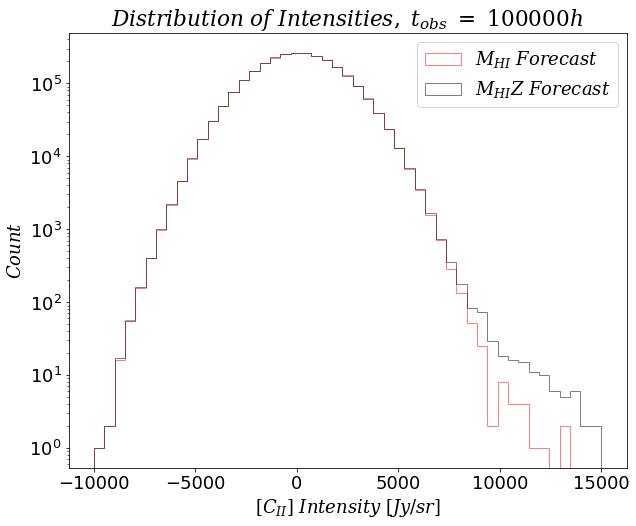

In [109]:
fig , axes = plt.subplots(nrows = 1, ncols = 1, figsize = (10, 8))

n_mhi, bins, _ = plt.hist(mhi_forecast.flatten(), bins = np.linspace(-10000, 15000, 50), edgecolor = 'r', label = r'$M_{HI}\ Forecast$', alpha = 0.5, histtype = 'step')
n_mhiz, _, _ = plt.hist(mhiz_forecast.flatten(), bins = bins, edgecolor = 'black', label = r'$M_{HI}Z\ Forecast$', alpha = 0.5, histtype = 'step')
plt.legend(loc='upper right')

center = (bins[:-1] + bins[1:]) / 2


plt.xlabel(r'$[C_{II}]\ Intensity\ [Jy/sr]$')
plt.ylabel(r'$Count$')
plt.yscale('log')
plt.title(r'$Distribution\ of\ Intensities,\ t_{obs}\ =\ 100000h$')
plt.savefig('may/histograms/mhi_mhiz.png', bbox_inches = 'tight')

/tmp/ipykernel_3627468/2169958019.py:1: RuntimeWarning: divide by zero encountered in divide
  plt.plot(center, -np.log(n_mhiz/n_mhi))


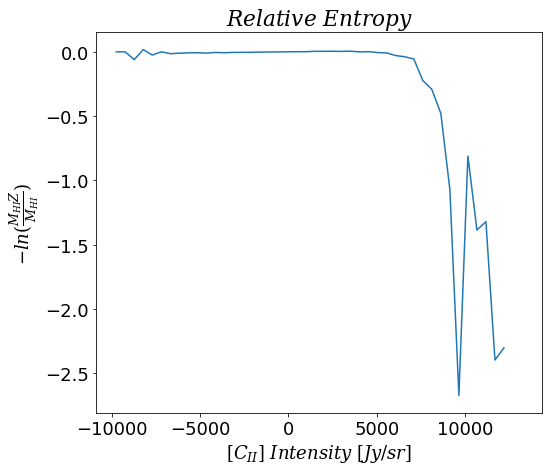

In [116]:
plt.plot(center, -np.log(n_mhiz/n_mhi))
plt.title(r'$Relative\ Entropy$')
plt.xlabel(r'$[C_{II}]\ Intensity\ [Jy/sr]$')
plt.ylabel(r'$-ln(\frac{M_{HI}Z}{M_{HI}})$')
plt.savefig('may/entropy/mhi_mhiz_entropy.png', bbox_inches = 'tight')

/tmp/ipykernel_3627468/1762087336.py:1: RuntimeWarning: divide by zero encountered in log
  plt.plot(center, n_mhi*(-np.log(n_mhi/n_mhiz)))
/tmp/ipykernel_3627468/1762087336.py:1: RuntimeWarning: invalid value encountered in multiply
  plt.plot(center, n_mhi*(-np.log(n_mhi/n_mhiz)))


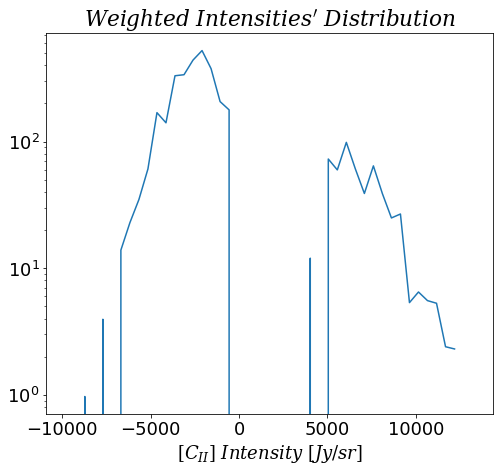

In [80]:
plt.plot(center, n_mhi*(-np.log(n_mhi/n_mhiz)))
plt.title(r"$Weighted\ Intensities'\ Distribution$")
plt.xlabel(r'$[C_{II}]\ Intensity\ [Jy/sr]$')
plt.yscale('log')
#plt.savefig('may/entropy/mhi_mhiz_entropy.png', bbox_inches = 'tight')

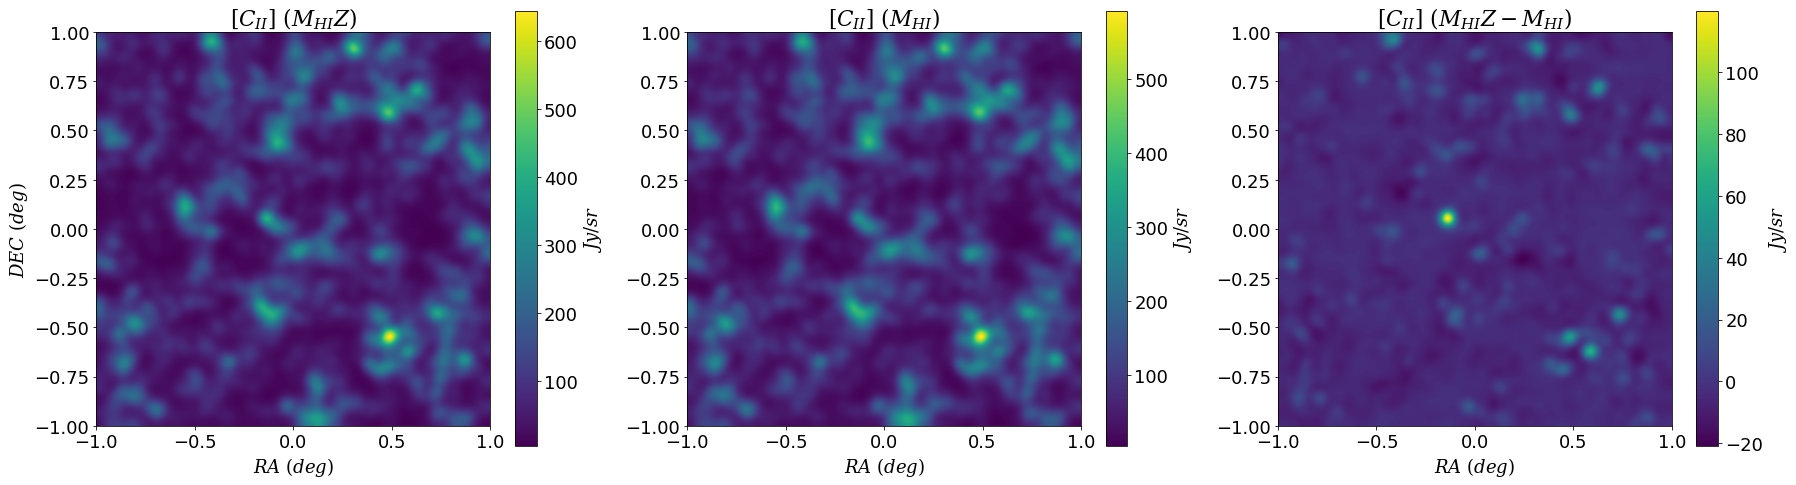

In [86]:
plt.rcParams["mathtext.fontset"] = "dejavuserif"
fig , axes = plt.subplots(nrows = 1, ncols = 3, figsize = (30, 8))

plt.subplot(131)
plt.imshow(gaussian_filter(mhiz_map.value[:, :, 5], 5), extent = [-1, 1, -1, 1])
plt.xlabel(r'$RA\ (deg)$')
plt.ylabel(r'$DEC\ (deg)$')
plt.title(r'$[C_{II}]\ (M_{HI}Z)$')
plt.colorbar(label = r'$Jy/sr$')

plt.subplot(132)
plt.imshow(gaussian_filter(mhi_map.value[:, :, 5], 5), extent = [-1, 1, -1, 1])
plt.xlabel(r'$RA\ (deg)$')
plt.title(r'$[C_{II}]\ (M_{HI})$')
plt.colorbar(label = r'$Jy/sr$')

plt.subplot(133)
plt.imshow(gaussian_filter((mhiz_map - mhi_map).value[:, :, 5], 5), extent = [-1, 1, -1, 1])
plt.xlabel(r'$RA\ (deg)$')
plt.title(r'$[C_{II}]\ (M_{HI}Z-M_{HI})$')
plt.colorbar(label = r'$Jy/sr$')

plt.savefig('may/maps/mhi_mhiz.png', bbox_inches = 'tight')